# Descripción del proyecto

## Inicialización 
En la primera parte de este trabajo se realizarán los siguientes procesos: 
1. Cargar librerías para realizar el análisis.
2. Importar dataset.  
3. Revisar datos para posterior limpieza y enrequecimiento en caso de ser necesario.

In [2]:
#Importar librerías 
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats as st
import datetime as dt

In [3]:
#Cargar datos 

hypotheses = pd.read_csv('/datasets/hypotheses_us.csv', sep=';')
orders = pd.read_csv('/datasets/orders_us.csv')
visits = pd.read_csv('/datasets/visits_us.csv')

In [4]:
#Crear función para exploración de datos 

def eda (df):
    print(df.head())
    print()
    print(df.info())    
    print()
    print(df.describe())
    print()
    print('NULOS:', df.isna().sum())
    print()
    print('FILAS DUPLICADAS:', df.duplicated().sum())

In [5]:
#Revisar 'hypotheses'

eda(hypotheses)

                                          Hypothesis  Reach  Impact  \
0  Add two new channels for attracting traffic. T...      3      10   
1  Launch your own delivery service. This will sh...      2       5   
2  Add product recommendation blocks to the store...      8       3   
3  Change the category structure. This will incre...      8       3   
4  Change the background color on the main page. ...      3       1   

   Confidence  Effort  
0           8       6  
1           4      10  
2           7       3  
3           3       8  
4           1       1  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+

In [6]:
#Leer hipótesis 

for fila in hypotheses['Hypothesis']:
    print(fila)
    print()

Add two new channels for attracting traffic. This will bring 30% more users

Launch your own delivery service. This will shorten delivery time

Add product recommendation blocks to the store's site. This will increase conversion and average purchase size

Change the category structure. This will increase conversion since users will find the products they want more quickly

Change the background color on the main page. This will increase user engagement

Add a customer review page. This will increase the number of orders

Show banners with current offers and sales on the main page. This will boost conversion

Add a subscription form to all the main pages. This will help you compile a mailing list

Launch a promotion that gives users discounts on their birthdays



In [7]:
#Revisar 'orders'
eda(orders)

   transactionId   visitorId        date  revenue group
0     3667963787  3312258926  2019-08-15     30.4     B
1     2804400009  3642806036  2019-08-15     15.2     B
2     2961555356  4069496402  2019-08-15     10.2     A
3     3797467345  1196621759  2019-08-15    155.1     B
4     2282983706  2322279887  2019-08-15     40.5     B

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB
None

       transactionId     visitorId       revenue
count   1.197000e+03  1.197000e+03   1197.000000
mean    2.155621e+09  2.165960e+09    131.491646
std     1.229085e+09  1.236014e+0

In [8]:
#Revisar que los visitantes solo pertenezcan a un grupo 

#unique_visitors = orders['visitorId'].unique()
#print(orders.query("visitorId in @unique_visitors"))

visitors_orders= orders.groupby('visitorId', as_index=False)['group'].nunique()
print(visitors_orders)
visitors_two_groups = visitors_orders.query("group > 1")
print(visitors_two_groups)
orders_filtered = orders.query("visitorId not in @visitors_two_groups['visitorId']")
print(orders_filtered)

       visitorId  group
0        5114589      1
1        6958315      1
2        8300375      2
3       11685486      1
4       39475350      1
...          ...    ...
1026  4266935830      2
1027  4278982564      1
1028  4279090005      1
1029  4281247801      1
1030  4283872382      1

[1031 rows x 2 columns]
       visitorId  group
2        8300375      2
44     199603092      2
51     232979603      2
55     237748145      2
66     276558944      2
84     351125977      2
97     393266494      2
114    457167155      2
119    471551937      2
122    477780734      2
192    818047933      2
236    963407295      2
299   1230306981      2
311   1294878855      2
316   1316129916      2
318   1333886533      2
340   1404934699      2
386   1602967004      2
393   1614305549      2
402   1648269707      2
406   1668030113      2
422   1738359350      2
436   1801183820      2
469   1959144690      2
487   2038680547      2
491   2044997962      2
569   2378935119      2
591   245800165

In [9]:
#orders_filtered = orders.query("visitorId in @visitors_two_groups['visitorId']").groupby(['visitorId', 'group'])['date'].min()
#orders_filtered

In [10]:
#Revisar visitantes por grupo en orders_filtered
orders_filtered.groupby('group')['visitorId'].count()

group
A    468
B    548
Name: visitorId, dtype: int64

In [11]:
eda(visits)

         date group  visits
0  2019-08-01     A     719
1  2019-08-02     A     619
2  2019-08-03     A     507
3  2019-08-04     A     717
4  2019-08-05     A     756

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB
None

           visits
count   62.000000
mean   607.290323
std    114.400560
min    361.000000
25%    534.000000
50%    624.500000
75%    710.500000
max    770.000000

NULOS: date      0
group     0
visits    0
dtype: int64

FILAS DUPLICADAS: 0


### Conclusiones

Se cargaron los datos en tres tablas: hypotheses, orders y visits. Luego se revisaron los datos en cada una de ellas, así como su distribución. Al aplicar distintos métodos de pandas, se comprobó que la información estaba completa, sin datos ausentes. Sin embargo, se identificó que algunos visitantes en la tabla orders estaban registrados en ambos grupos de testeo, por lo que se creó una nueva tabla, orders_filtered, que contiene únicamente datos de usuarios asignados a un solo grupo y con la cual se trabajará por esta misma razón. Además, la exploración inicial reveló la necesidad de renombrar algunas columnas y ajustar el tipo de dato de las columnas que contenían fechas.

## Preprocesamiento de datos 


In [12]:
#Modificar nombre columnas 'hypotheses'

new_columns = []

for name in hypotheses.columns:
    name_lowered = name.lower()
    new_columns.append(name_lowered)

hypotheses.columns = new_columns

In [13]:
#Modificar nombre columnas de 'orders' y 'orders_filtered'

orders_filtered = orders_filtered.rename(columns={'transactionId': 'transaction_id', 'visitorId': 'visitor_id'})

In [14]:
#Modificar tipo de dato columnas date de 'orders_filtered'
orders_filtered['date'].map(lambda fila: dt.datetime.strptime(fila, '%Y-%m-%d'))

0      2019-08-15
1      2019-08-15
3      2019-08-15
4      2019-08-15
5      2019-08-15
          ...    
1191   2019-08-14
1192   2019-08-14
1193   2019-08-14
1194   2019-08-14
1196   2019-08-15
Name: date, Length: 1016, dtype: datetime64[ns]

In [15]:
#Modificar tipo de dato en visits

visits['date'].map(lambda fila: dt.datetime.strptime(fila, '%Y-%m-%d'))

0    2019-08-01
1    2019-08-02
2    2019-08-03
3    2019-08-04
4    2019-08-05
        ...    
57   2019-08-27
58   2019-08-28
59   2019-08-29
60   2019-08-30
61   2019-08-31
Name: date, Length: 62, dtype: datetime64[ns]

In [16]:
#Revisar que los cambios de hayan efectuado
orders_filtered.info()
print()
visits.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1016 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   transaction_id  1016 non-null   int64  
 1   visitor_id      1016 non-null   int64  
 2   date            1016 non-null   object 
 3   revenue         1016 non-null   float64
 4   group           1016 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 47.6+ KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


### Conclusiones 
En esta etapa, se renombraron las columnas para seguir un formato estándar y se convirtió el tipo de dato de las columnas de fechas a datetime para facilitar su uso en el análisis.

## Análisis

### Priorización de hipótesis

In [17]:
hypotheses.head()

,hypothesis,reach,impact,confidence,effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1


In [18]:
#Calcular ICE de las hipótesis
hypotheses['ICE'] = (hypotheses['impact'] * hypotheses['confidence']) / hypotheses['effort']

print(hypotheses.sort_values(by='ICE', ascending=False))

                                          hypothesis  reach  impact  \
8  Launch a promotion that gives users discounts ...      1       9   
0  Add two new channels for attracting traffic. T...      3      10   
7  Add a subscription form to all the main pages....     10       7   
6  Show banners with current offers and sales on ...      5       3   
2  Add product recommendation blocks to the store...      8       3   
1  Launch your own delivery service. This will sh...      2       5   
5  Add a customer review page. This will increase...      3       2   
3  Change the category structure. This will incre...      8       3   
4  Change the background color on the main page. ...      3       1   

   confidence  effort        ICE  
8           9       5  16.200000  
0           8       6  13.333333  
7           8       5  11.200000  
6           8       3   8.000000  
2           7       3   7.000000  
1           4      10   2.000000  
5           2       3   1.333333  
3        

In [19]:
#Calcular RICE de las hipótesis
hypotheses['RICE'] = (hypotheses['reach'] * hypotheses['impact'] * hypotheses['confidence']) / hypotheses['effort']

print(hypotheses.sort_values(by='RICE', ascending=False))

                                          hypothesis  reach  impact  \
7  Add a subscription form to all the main pages....     10       7   
2  Add product recommendation blocks to the store...      8       3   
0  Add two new channels for attracting traffic. T...      3      10   
6  Show banners with current offers and sales on ...      5       3   
8  Launch a promotion that gives users discounts ...      1       9   
3  Change the category structure. This will incre...      8       3   
1  Launch your own delivery service. This will sh...      2       5   
5  Add a customer review page. This will increase...      3       2   
4  Change the background color on the main page. ...      3       1   

   confidence  effort        ICE   RICE  
7           8       5  11.200000  112.0  
2           7       3   7.000000   56.0  
0           8       6  13.333333   40.0  
6           8       3   8.000000   40.0  
8           9       5  16.200000   16.2  
3           3       8   1.125000    9

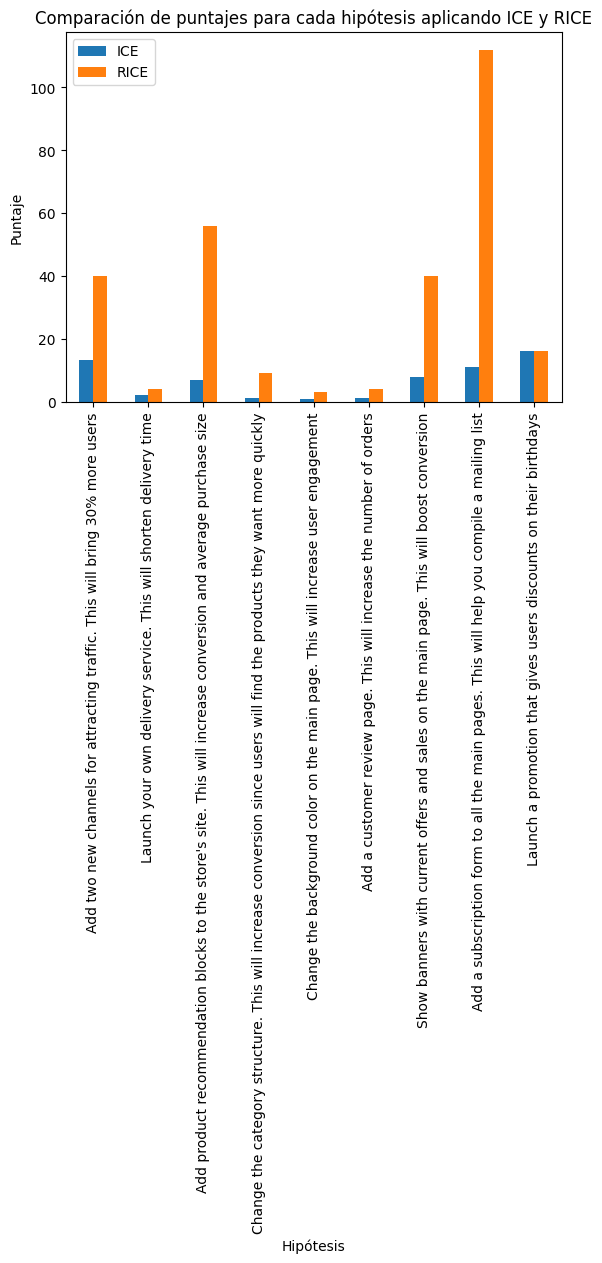

In [68]:
#Graficar resultados cálculos ICE y RICE
hypotheses.plot(kind='bar',
            x='hypothesis',
            y=['ICE', 'RICE'],
            xlabel='Hipótesis',
            ylabel='Puntaje',
            rot=90,
            title='Comparación de puntajes para cada hipótesis aplicando ICE y RICE')

plt.legend(['ICE', 'RICE'])
plt.show()

#### Conclusiones 

El top 5 de hipótesis analizando el ICE son:
1. Launch a promotion that gives users discounts on their birthdays.
2. Add two new channels for attracting traffic. This will bring 30% more users.
3. Add a subscription form to all the main pages. This will help you compile a mailing list.
4. Show banners with current offers and sales on the main page. This will boost conversion.
5. Add product recommendation blocks to the store's site. This will increase conversion and average purchase size.

El top 5 de hipótesis analizando el RICE son:

1. Add a subscription form to all the main pages. This will help you compile a mailing list.
2. Add product recommendation blocks to the store's site. This will increase conversion and average purchase size.
3. Add two new channels for attracting traffic. This will bring 30% more users.
4. Show banners with current offers and sales on the main page. This will boost conversion.
5. Launch a promotion that gives users discounts on their birthdays.


Al revisar estos rankings, podemos observar que las mismas cinco hipótesis son las mejor evaluadas, independientemente del framework utilizado para evaluar su potencial de impacto. Sin embargo, los resultados sobre los efectos posibles de estas hipótesis varían al considerar un marco de referencia u otro. Al analizar las diferencias en la priorización de hipótesis entre ICE y RICE, se puede concluir que las mejores hipótesis a considerar son "Add two new channels for attracting traffic. This will bring 30% more users" y "Add a subscription form to all the main pages. This will help you compile a mailing list", ya que su posición se mantiene relativamente estable entre ambos frameworks.

Se llevará a cabo una prueba A/B para la siguiente hipótesis: "Add a subscription form to all the main pages. This will help you compile a mailing list." Esta hipótesis fue seleccionada porque, aunque sus puntajes son similares a los de la segunda mejor opción, obtuvo una mejor calificación en el modelo RICE, que considera más factores y, por lo tanto, es más detallado. Además, su puntaje de esfuerzo es menor, lo que implica una inversión más baja en comparación con la hipótesis "Add two new channels for attracting traffic. This will bring 30% more users."

### Análisis del Test A/B

In [20]:
#Crear tabla de fecha de órdenes por grupo
grupos_de_fecha = orders_filtered[['date', 'group']].drop_duplicates()
grupos_de_fecha

,date,group
0,2019-08-15,B
7,2019-08-15,A
45,2019-08-16,A
47,2019-08-16,B
55,2019-08-01,A
...,...,...
1068,2019-08-12,A
1114,2019-08-13,B
1116,2019-08-13,A
1149,2019-08-14,B


In [21]:
#Crear df con las órdenes acumuladas por fecha y grupo
ordenes_acumuladas = grupos_de_fecha.apply(
    lambda fila: orders_filtered[np.logical_and(orders_filtered['date'] <= fila['date'], orders_filtered['group'] == fila['group'])]
    .agg({
        'date':'max',
        'group': 'max',
        'transaction_id':pd.Series.nunique,
        'visitor_id': pd.Series.nunique,
        'revenue': 'sum'
    }), axis=1
).sort_values(by=['date', 'group'])

In [22]:
ordenes_acumuladas

,date,group,transaction_id,visitor_id,revenue
55,2019-08-01,A,23,19,2266.6
66,2019-08-01,B,17,17,967.2
175,2019-08-02,A,42,36,3734.9
173,2019-08-02,B,40,39,3535.3
291,2019-08-03,A,66,60,5550.1
...,...,...,...,...,...
533,2019-08-29,B,510,490,74576.7
757,2019-08-30,A,460,437,52363.7
690,2019-08-30,B,531,511,77863.5
958,2019-08-31,A,468,445,53212.0


In [23]:
#Crear df con las visitas acumuladas por fecha y grupo
visitas_acumuladas = grupos_de_fecha.apply(
    lambda fila: visits[np.logical_and(visits['date'] <= fila['date'], visits['group'] == fila['group'])]
    .agg({
        'date':'max',
        'group': 'max',
        'visits':'sum',
        
        }), axis=1
).sort_values(by=['date', 'group'])

In [24]:
visitas_acumuladas

,date,group,visits
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845
...,...,...,...
533,2019-08-29,B,17708
757,2019-08-30,A,18037
690,2019-08-30,B,18198
958,2019-08-31,A,18736


In [25]:
#Unir df de órdenes y visitas acumuladas
datos_acumulados = ordenes_acumuladas.merge(visitas_acumuladas, how='inner', on=['date', 'group'])
datos_acumulados.columns=['fecha', 'grupo', 'ordenes', 'compradores', 'margen', 'visitas']

In [26]:
datos_acumulados

,fecha,grupo,ordenes,compradores,margen,visitas
0,2019-08-01,A,23,19,2266.6,719
1,2019-08-01,B,17,17,967.2,713
2,2019-08-02,A,42,36,3734.9,1338
3,2019-08-02,B,40,39,3535.3,1294
4,2019-08-03,A,66,60,5550.1,1845
...,...,...,...,...,...,...
57,2019-08-29,B,510,490,74576.7,17708
58,2019-08-30,A,460,437,52363.7,18037
59,2019-08-30,B,531,511,77863.5,18198
60,2019-08-31,A,468,445,53212.0,18736


In [27]:
#Separar df por grupo
datos_acumulados_a = datos_acumulados.query("grupo == 'A'")

datos_acumulados_b = datos_acumulados.query("grupo == 'B'")

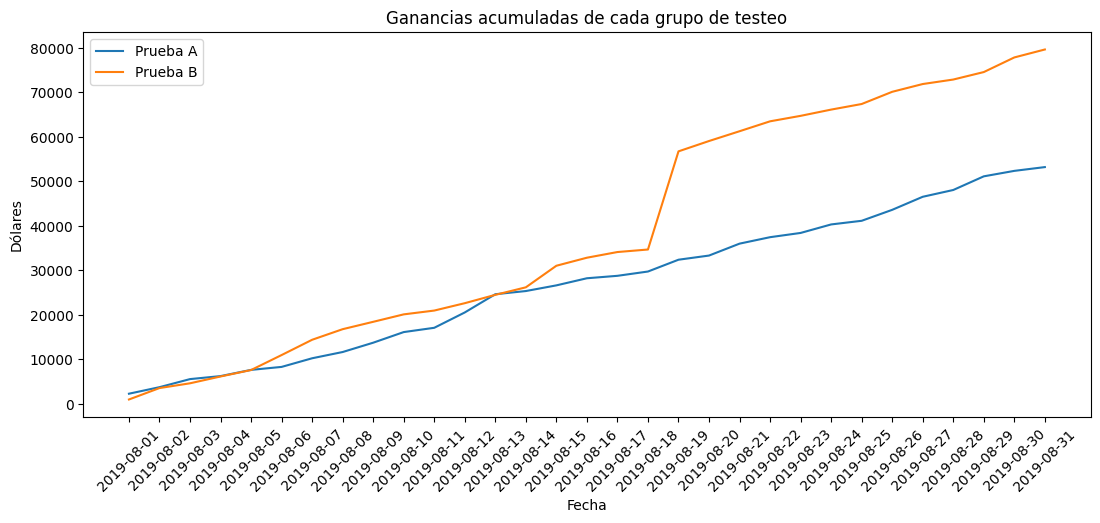

In [28]:
#Graficar ganancias por grupo

plt.figure(figsize=(13,5))

plt.plot(datos_acumulados_a['fecha'], datos_acumulados_a['margen'], label='Prueba A')

plt.plot(datos_acumulados_b['fecha'], datos_acumulados_b['margen'], label='Prueba B')

plt.xticks(rotation=45)
plt.title('Ganancias acumuladas de cada grupo de testeo')
plt.xlabel('Fecha')
plt.ylabel('Dólares')
plt.legend()

plt.show()

El gráfico muestra una ganancia acumulada similar entre ambos grupos hasta el 17 de agosto de 2018. A partir de esa fecha, el grupo B aumenta sus ganancias en casi 30,000 dólares más que el grupo A y luego mantiene un crecimiento estable.

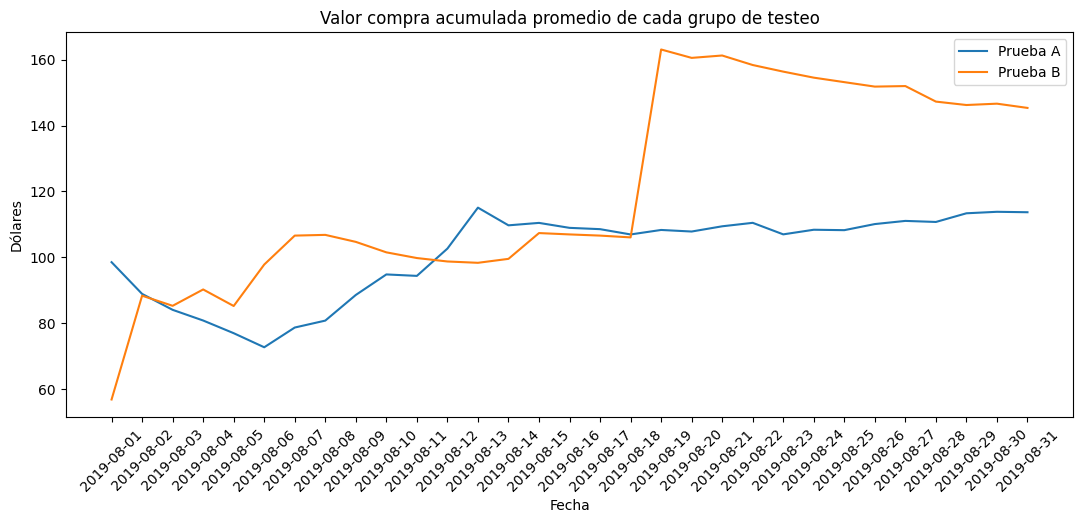

In [29]:
#Graficar compra acumulada promedio por grupo

plt.figure(figsize=(13,5))

plt.plot(datos_acumulados_a['fecha'], datos_acumulados_a['margen'] /datos_acumulados_a['ordenes'] , label='Prueba A')

plt.plot(datos_acumulados_b['fecha'], datos_acumulados_b['margen'] / datos_acumulados_b['ordenes'], label='Prueba B')

plt.xticks(rotation=45)
plt.title('Valor compra acumulada promedio de cada grupo de testeo')
plt.xlabel('Fecha')
plt.ylabel('Dólares')
plt.legend()

plt.show()

Desde el inicio de las pruebas hasta el 17 de agosto de 2019, los valores promedio de las compras acumuladas presentan fluctuaciones significativas de un día a otro. Además, es difícil determinar cuál grupo es superior, ya que ambos muestran comportamientos variables durante ese período. Sin embargo, entre el 17 y 18 de agosto, se observa un incremento notable en el margen promedio de compra del grupo B, superando al grupo A por aproximadamente 60 dólares. En los días siguientes, el grupo B experimenta una leve disminución en este valor, pero continúa manteniendo una ganancia superior al grupo A, cuyo ingreso promedio por compra se mantiene entre 110 y 120 dólares.

In [30]:
#Crear df con datos acumulados de ambos grupos de testeo por fecha
datos_acumulados_merge = datos_acumulados_a.merge(datos_acumulados_b, how='inner', on='fecha', suffixes=['_a', '_b'])

In [31]:
datos_acumulados_merge

,fecha,grupo_a,ordenes_a,compradores_a,margen_a,visitas_a,grupo_b,ordenes_b,compradores_b,margen_b,visitas_b
0,2019-08-01,A,23,19,2266.6,719,B,17,17,967.2,713
1,2019-08-02,A,42,36,3734.9,1338,B,40,39,3535.3,1294
2,2019-08-03,A,66,60,5550.1,1845,B,54,53,4606.9,1803
3,2019-08-04,A,77,71,6225.6,2562,B,68,66,6138.5,2573
4,2019-08-05,A,99,92,7623.6,3318,B,89,87,7587.8,3280
5,2019-08-06,A,114,104,8292.0,3985,B,112,109,10957.1,3935
6,2019-08-07,A,130,120,10234.0,4629,B,135,132,14392.7,4644
7,2019-08-08,A,144,133,11638.8,5239,B,157,154,16772.6,5298
8,2019-08-09,A,155,143,13734.0,5856,B,176,173,18428.8,5908
9,2019-08-10,A,170,158,16121.5,6262,B,198,195,20103.6,6277


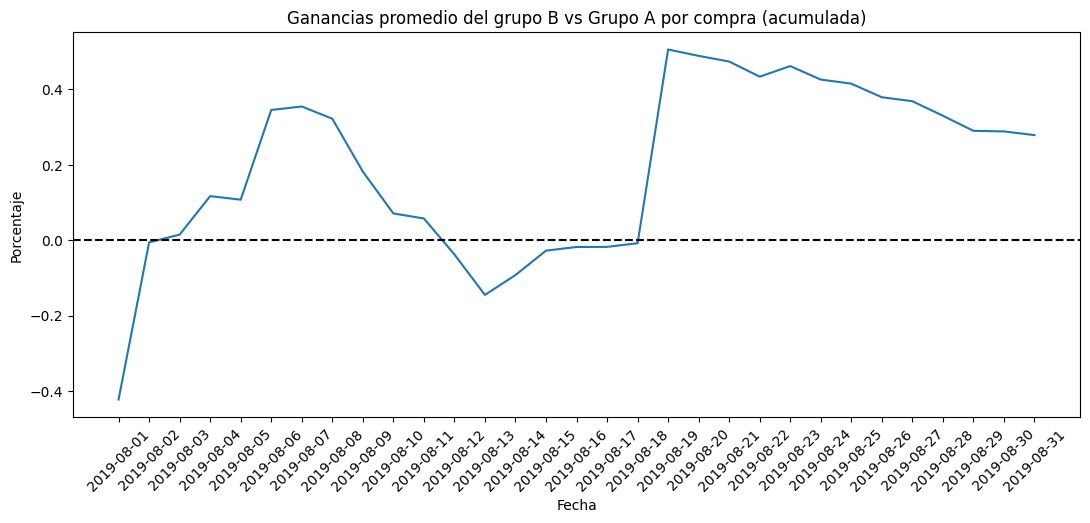

In [32]:
#Graficar la comparación de ganancias promedio del grupo de testeo B con respecto al grupo A

plt.figure(figsize=(13,5))

plt.plot(
    datos_acumulados_merge['fecha'], 
    ((datos_acumulados_merge['margen_b'] / datos_acumulados_merge['ordenes_b'])/(datos_acumulados_merge['margen_a'] / datos_acumulados_merge['ordenes_a'])) -1 
)

plt.xticks(rotation=45)
plt.title('Ganancias promedio del grupo B vs Grupo A por compra (acumulada)')
plt.xlabel('Fecha')
plt.ylabel('Porcentaje')
plt.axhline(y=0, color='black', linestyle='--')

plt.show()

El gráfico muestra que, aunque al inicio de las pruebas el grupo B generaba casi un 40% menos en ganancias que el grupo A, logró registrar ingresos superiores durante gran parte del período de prueba. Una excepción notable ocurrió entre los días 10 y 17 de agosto, cuando el grupo B presentó compras de menor valor en comparación con el grupo de control. Esto podría deberse a un período de ajuste por parte de los visitantes, quienes, tras adaptarse a los cambios, parecen haber respondido positivamente. A partir del 18 de agosto, se observa un pico de crecimiento en el valor promedio de las compras del grupo B, alcanzando casi un 50% más que las del grupo A y manteniendo consistentemente mejores resultados en ventas.

In [33]:
#Calcular conversión acumulada

conver_acum_a = datos_acumulados_merge['ordenes_a'] / datos_acumulados_merge['visitas_a']

conver_acum_b = datos_acumulados_merge['ordenes_b'] / datos_acumulados_merge['visitas_b']

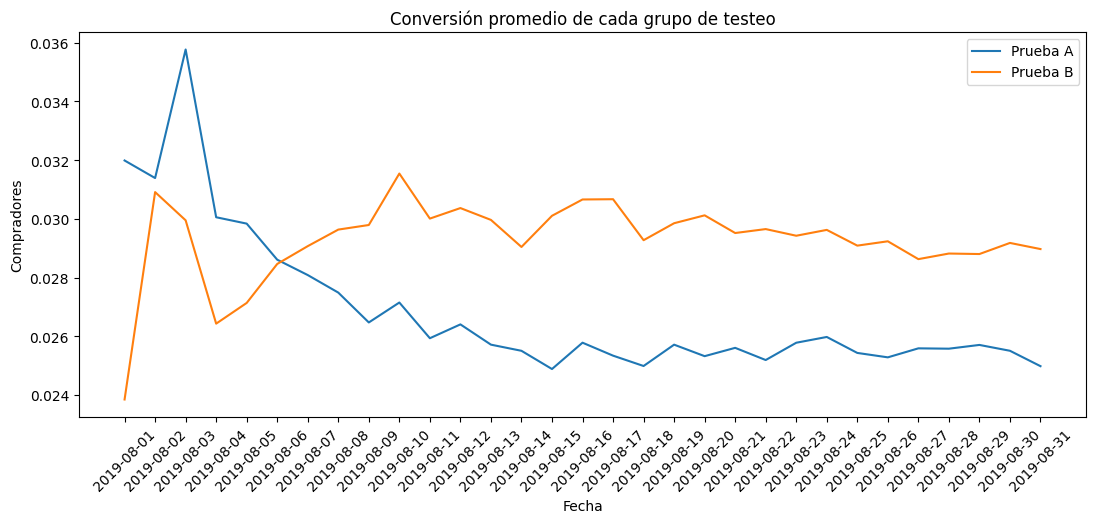

In [34]:
#Graficar conversión gráfica de cada grupo

plt.figure(figsize=(13,5))

plt.plot(datos_acumulados_a['fecha'], conver_acum_a , label='Prueba A')

plt.plot(datos_acumulados_b['fecha'], conver_acum_b, label='Prueba B')

plt.xticks(rotation=45)
plt.title('Conversión promedio de cada grupo de testeo')
plt.xlabel('Fecha')
plt.ylabel('Compradores')
plt.legend()

plt.show()

Al inicio, las tasas de conversión son mayores en el grupo A, posiblemente debido a la familiaridad de los visitantes con la plataforma. Sin embargo, el grupo B logra recuperarse, y a partir del 5 de agosto comienza a registrar porcentajes de conversión superiores, mientras que los del grupo A disminuyen. Ambas tasas presentan fluctuaciones leves hasta el 20 de agosto, momento en el que los datos comienzan a estabilizarse.

In [35]:
#Crear df con cantidad de pedidos por usuarios 

ordenes_por_usuario = (
     orders_filtered.drop(['group', 'revenue', 'date'], axis=1)
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)

ordenes_por_usuario.columns = ['visitante', 'ordenes']

In [36]:
print(ordenes_por_usuario)

      visitante  ordenes
0       5114589        1
1       6958315        1
2      11685486        1
3      39475350        1
4      47206413        1
..          ...      ...
968  4259830713        1
969  4278982564        1
970  4279090005        1
971  4281247801        1
972  4283872382        1

[973 rows x 2 columns]


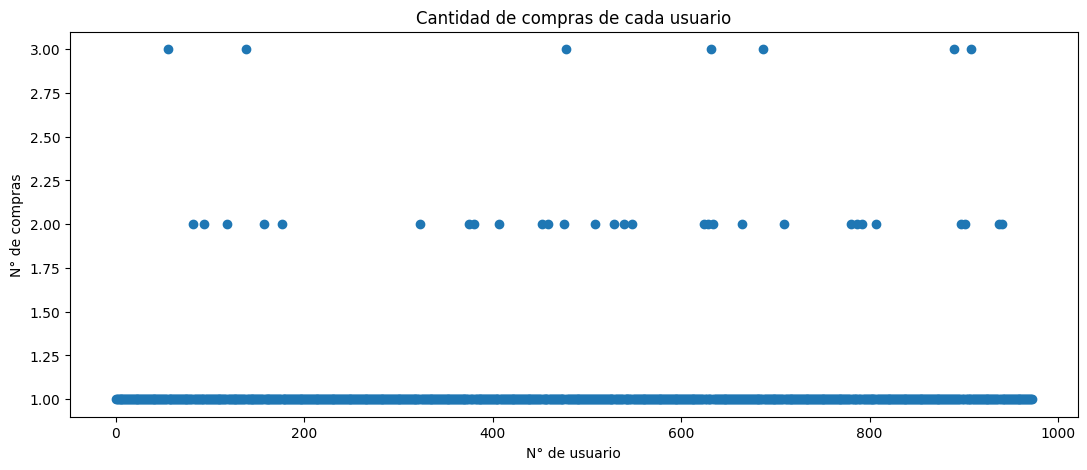

In [37]:
#Trazar gráfico de dispersión de las compras por usuario

valores_x = pd.Series(range(0,len(ordenes_por_usuario)))

plt.figure(figsize=(13,5))
plt.scatter(valores_x, ordenes_por_usuario['ordenes'])
plt.title('Cantidad de compras de cada usuario')
plt.xlabel('N° de usuario')
plt.ylabel('N° de compras')

plt.show()

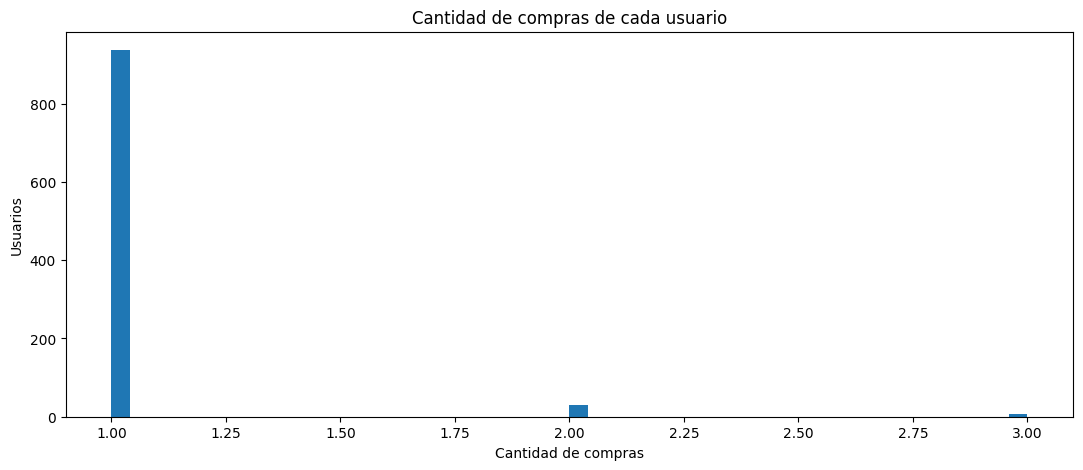

In [64]:
#graficar histograma con los mismos valores 

plt.figure(figsize=(13,5))
plt.hist(ordenes_por_usuario['ordenes'], bins=50)
plt.title('Cantidad de compras de cada usuario')
plt.xlabel('Cantidad de compras')
plt.ylabel('Usuarios')

plt.show()

In [39]:
#Calcular los percentiles 95 y 99 del número de pedidos por usuario

np.percentile(ordenes_por_usuario['ordenes'], [95, 99])

array([1., 2.])

Al revisar el gráfico de pedidos por usuario y los percentiles 95 y 99, podemos confirmar que la gran mayoría de los usuarios realizan un pedido, solo el 5% compra más de 1 vez y el 1% compra más de 2 veces. 

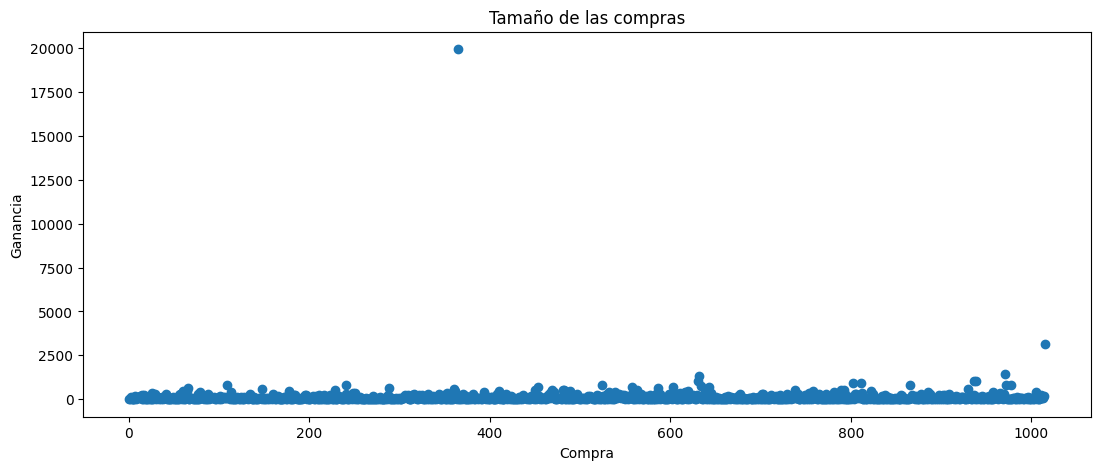

In [40]:
#Trazar gráfico de dispersión del tamaño de las compras
valores_x= pd.Series(range(0, len(orders_filtered['revenue'])))

plt.figure(figsize=(13,5))
plt.scatter(valores_x, orders_filtered['revenue'])
plt.title('Tamaño de las compras')
plt.xlabel('Compra')
plt.ylabel('Ganancia')

plt.show()

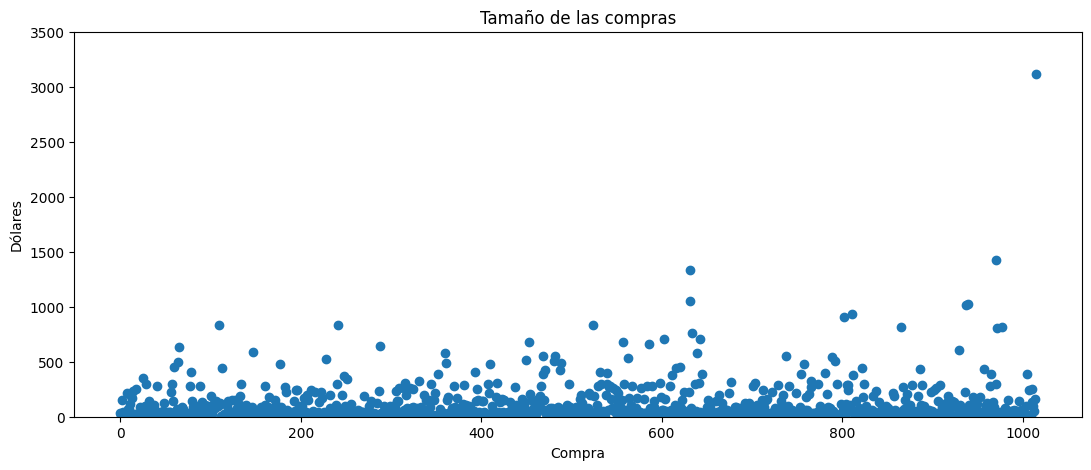

In [41]:
#Cambio visualización gráfico tamaño de las compras 

valores_x= pd.Series(range(0, len(orders_filtered['revenue'])))

plt.figure(figsize=(13,5))
plt.scatter(valores_x, orders_filtered['revenue'])
plt.title('Tamaño de las compras')
plt.xlabel('Compra')
plt.ylabel('Dólares')
plt.ylim((0,3500))

plt.show()

In [42]:
#Calcular los percentiles 95 y 99 de los precios de los pedidos

np.percentile(orders_filtered['revenue'], [95, 99])

array([414.275, 830.3  ])

Como se puede apreciar en la gráfica anterior, la mayoría de las compras tienen un valor inferior a los 500 dólares. Al revisar los percentiles, confrimamos que no más del 5% realiza compra sobre los 414 dólares y solo un 1% tiene compras avaluadas en más de 830 dólares. 

In [43]:
#Calcular significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos en bruto

    #crear variables con número de órdenes por usuario
    
ordenes_usuario_a = orders_filtered[orders_filtered['group']=='A'].groupby('visitor_id', as_index=False).agg({'transaction_id' : pd.Series.nunique})
ordenes_usuario_a.columns = ['id_usuario', 'ordenes']

ordenes_usuario_b = orders_filtered[orders_filtered['group']=='B'].groupby('visitor_id', as_index=False).agg({'transaction_id' : pd.Series.nunique})
ordenes_usuario_b.columns = ['id_usuario', 'ordenes']


In [44]:
    #crear variables de muestras para cada grupo

longitud_a = pd.Series(0, index=np.arange(visits[visits['group'] == 'A']['visits'].sum() - len(ordenes_usuario_a ['ordenes'])), name ='ordenes')
muestra_a = pd.concat([ordenes_usuario_a ['ordenes'], longitud_a], axis=0)

longitud_b = pd.Series(0, index=np.arange(visits[visits['group'] == 'B']['visits'].sum() - len(ordenes_usuario_b ['ordenes'])), name ='ordenes')
muestra_b = pd.concat([ordenes_usuario_b ['ordenes'], longitud_b], axis=0)

In [45]:
    #calcular 

print("{0:.3f}".format(st.mannwhitneyu(muestra_a, muestra_b)[1]))

print("{0:.3f}".format(muestra_b.mean()/muestra_a.mean()-1))

0.011
0.160


Al estudiar los datos en bruto, podemos dar cuenta que sí hay una diferencia estadística en la conversión promedio de ambos grupos porque el valor p es menor a 0.05. Además podemos dar cuenta que la conversión del grupo B es 16% mejor que las del grupo de control. Esto confirma lo visualizado en los gráficos. 

In [46]:
#Calcular la diferencia relativa en el tamaño promedio de pedido entre los grupos

print('{0:.3f}'.format(st.mannwhitneyu(orders_filtered[orders_filtered['group']=='A']['revenue'], orders_filtered[orders_filtered['group']=='B']['revenue'])[1]))
print('{0:.3f}'.format(orders_filtered[orders_filtered['group']=='B']['revenue'].mean()/orders_filtered[orders_filtered['group']=='A']['revenue'].mean()-1))

0.862
0.278


En caso contrario, no se puede descartar que la distribución de ambos grupos sea diferente. Sin embargo, se puede confirmar que el grupo B tiene una ganancia superior al grupo A en casi un 27%

In [47]:
#Calcular significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos filtrados

    #encontrar usuarios con compras anómalas
muchas_ordenes= pd.concat([ordenes_usuario_a[ordenes_usuario_a['ordenes'] > 1]['id_usuario'], ordenes_usuario_b[ordenes_usuario_b['ordenes'] > 1]['id_usuario']], axis = 0)
ordenes_caras = orders_filtered[orders_filtered['revenue'] > 415]['visitor_id']
compras_anomalas = pd.concat([muchas_ordenes, ordenes_caras], axis = 0).drop_duplicates().sort_values()
print(compras_anomalas.head())
print(compras_anomalas.shape)

568     113298937
1099    148427295
928     204675465
33      249864742
684     358944393
dtype: int64
(86,)


In [48]:
    #filtrar muestras 
muestra_a_filtrada = pd.concat([ordenes_usuario_a[np.logical_not(ordenes_usuario_a['id_usuario'].isin(compras_anomalas))]['ordenes'],pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum() - len(ordenes_usuario_a['ordenes'])),name='ordenes')],axis=0)

muestra_b_filtrada = pd.concat([ordenes_usuario_b[np.logical_not(ordenes_usuario_b['id_usuario'].isin(compras_anomalas))]['ordenes'],pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum() - len(ordenes_usuario_b['ordenes'])),name='ordenes')],axis=0)

In [49]:
    #calcular destribuciones y diferencia significativa
print("{0:.3f}".format(st.mannwhitneyu(muestra_a_filtrada, muestra_b_filtrada)[1]))

print("{0:.3f}".format(muestra_b_filtrada.mean()/muestra_a_filtrada.mean()-1))   

0.011
0.185


Al eliminar los datos anómalos y realizar nuevamente las pruebas estadísticas, confirmamos que las distribuciones de conversión en ambos grupos son diferentes, reafirmando que el grupo B tiene un porcentaje de conversión superior, ahora casi un 19% mayor que el del grupo A.

In [50]:
#Calcular la diferencia relativa en el tamaño promedio de pedido entre los grupos con datos filtrados

    #calcular diferencia en distribuciones
print("{0:.3f}".format(st.mannwhitneyu(
    orders_filtered[np.logical_and(
        orders_filtered['group']=='A',  
        np.logical_not(orders_filtered['visitor_id'].isin(compras_anomalas)))]['revenue'],  
    orders_filtered[np.logical_and(
        orders_filtered['group']=='B',
        np.logical_not(orders_filtered['visitor_id'].isin(compras_anomalas)))]['revenue']  
)[1]))  

    #mostrar la diferencia relativa en el ingreso medio entre los grupos B y A
print("{0:.3f}".format(
    orders_filtered[np.logical_and(orders_filtered['group']=='B',  
           np.logical_not(orders_filtered['visitor_id'].isin(compras_anomalas)))]['revenue'].mean() / 
    orders_filtered[np.logical_and(orders_filtered['group']=='A',  
           np.logical_not(orders_filtered['visitor_id'].isin(compras_anomalas)))]['revenue'].mean() - 1))  

0.771
-0.033


Esta vez, sin los datos anómalos, nuevamente rechazamos la hipótesis de que las distribuciones del tamaño de las compras en ambos grupos sean diferentes. A diferencia de la prueba con los datos sin filtrar, en esta ocasión los resultados reflejan que las ganancias promedio por compra del grupo B son un 3% menores que las del grupo A.

#### Conclusiones
Se recomienda concluir el testeo, ya que las gráficas muestran una estabilización de los datos en el tiempo. Estas observaciones destacan la superioridad del grupo B en ingresos, tasas de conversión y valor promedio de compra, lo cual ha sido corroborado mediante cálculos estadísticos. Aunque el margen de ganancias ha variado según se incluyeran o no datos filtrados, con un aumento del 27% para el grupo B en los datos brutos y una disminución del 3% al excluir anomalías, las demás métricas han mantenido una tendencia consistente. Dado que los datos anómalos también representan ingresos reales, se considera que el grupo B supera al grupo de control A.